<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210708.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 웹 애플리케이션

> migration  
> makemigrations : 모델 변경을 감지하고 변경사항을 반영할 파일 생성  
manage.py -> migrate ->database

>HTTP Protocol  : GET, POST   
* GET  
주소창?key=value(쿼리데이터)  
주소창에 추가적인 데이터를 넣는 방식  
주소창에 넣는데 한계가 있다.  
* POST  
post + body  
http body 안에다가 추가적인 데이터를 넣는다.  



return render(request, 'accountapp/hello_world.html', context={'text':'POST METHOD!'})  
context는 문맥.

    < h3>{{  }}</h3 > : 단순 변수 출력 쌍괄호

In [ ]:
#view.py
def hello_world(request):
    if request.method == "POST":
        return render(request, 'accountapp/hello_world.html', context={'text':'POST METHOD!'})
    else:
        return render(request, 'accountapp/hello_world.html', context={'text':'GET METHOD!'})

#templates/accountapp/hello_world.html
<div style="margin: 2rem; text-align: center">
  <h1>METHOD</h1>

  <h3>{{ text }}</h3>

In [ ]:
    <div style="margin: 2rem; text-align: center">
    <h1>METHOD</h1>
    <form action="/accounts/hello_world/"method="post">       #action에 요청할 post html주소 입력
        {% csrf_token %}                                      #장고에서 post를 요청할 때는 반드시 넣어주어야 정상적으로 작동

        <input class="btn btn-primary rounded-pill px-2 py-2" type="submit">     #px : x축 padding늘려주고, py : y축 padding늘려줌 5까지 지원
                                                                                 #bootstrap의 button에서 class를 가져온다, rounded-pill은 버튼을 round한 모양으로 바꿔줌
    </form>


<input type="text" name="hello_world_input">
#views.py에 
    if request.method == "POST":

        temp = request.POST.get('hello_world_input')


        return render(request, 'accountapp/hello_world.html', context={'text':temp})


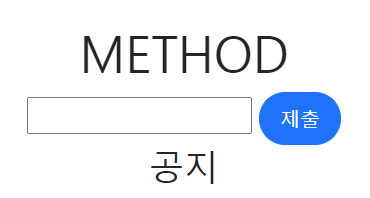![image.png](
  
)

In [ ]:
###데이터베이스 모델을 하나 생성한후 text에 입력한 데이터가 모델에 저장되게 한 후
# 출력하게 하는 방법

#hello_world.html
    <input type="text" name="hello_world_input">를 추가해준다.

#views.py
from accountapp.models import HelloWorld
def hello_world(request):
    if request.method == "POST":

        temp = request.POST.get('hello_world_input')

        new_hello_world = HelloWorld()        #models.py에 만들었던 모델
        new_hello_world.text = temp
        new_hello_world.save()

        return render(request, 'accountapp/hello_world.html', context={'hello_world_output':new_hello_world})
    else:
        return render(request, 'accountapp/hello_world.html', context={'text':'GET METHOD!'})

#hello_world.html
    {% if hello_world_output %}     
    <h3>{{ hello_world_output.text }}</h3>
    {% endif %}

#if, endif를 사용하여 hello_world_output값이 있으면 출력해준다.

#database에 들어가서 sqlite driver를 다운로드 하면 데이터베이스를 볼 수 있다.

# 2. 알고리즘

In [ ]:
#스택
def push(stack,x) : 
  stack.append(x)

def pop(stack):
  if empty(stack)==1:
    return -1
  else:
    return stack.pop()
def size(stack):
  return len(stack)
def empty(stack):
  if len(stack)==0:
    return 1
  else:
    return 0
def top(stack):
  if empty(stack)==1:
    return -1
  else:
    return stack[-1]

In [ ]:
#저번시간 문제 풀이 210706.ipynb 참고

def run_cmd_with_stack(stack,cmd):
  cmd_type = cmd[0]
  if cmd_type=='push':
    _, num = cmd
    stack.append(int(num))          #stack : global을 쓰던가, 파라미터로 주어야 한다. 
  elif cmd_type == 'pop':
    if len(stack)>0:print(stack.pop())
    else : print(-1)
  elif cmd_type == 'size':
    print(len(stack))
  elif cmd_type == 'empty':
    if len(stack)>0 : print(0)
    else: print(1)
  elif cmd_type == 'top':
    if len(stack)>0:print(stack[-1])
    else: print(-1)
  return stack


stack=[]
n=int(input())
for _ in range(n):
  #"push 2".split() -> ["push",2]
  #"size".split()  -> ["size"]  
  command = input().split()
  stack = run_cmd_with_stack(stack,command)

14
push 2
push 345
push 58
pop
58
top
345
size
2
empty
0
pop
345
pop
2
pop
-1
top
-1
size
0
push 123
pop
123


In [ ]:
#len , append, pop 을 쓰지 않고 사용하기 풀이

def run_cmd_with_stack(stack,stack_size, cmd):
  cmd_type = cmd[0]

  if cmd_type=='push':
    _,num = cmd
    stack.append(int(num))  
    stack_size += 1 
  elif cmd_type == 'pop':
    if stack_size > 0:
      print(stack.pop()) 
      stack_size -= 1
    else : print(-1)
  elif cmd_type == 'size':
    print(stack_size)
  elif cmd_type == 'empty':
    if stack_size > 0 : print(0)
    else: print(1)
  elif cmd_type == 'top':
    if stack_size > 0 : print(stack[stack_size])
    else: print(-1)
  return stack, stack_size


stack=[]
stack_size = 0
n=int(input())
for _ in range(n):
  command = input().split()
  stack, stack_size = run_cmd_with_stack(stack,stack_size,command)


3
push 3
push 2
pop
2


In [ ]:
#Class 이용
class Stack:
  def __init__(self):
    self.stack = []
    self.stack_size = 0

  def push(self, num):
    self.stack.append(int(num))
    self.stack_size += 1
  
  def pop(self):
    if self.stack_size > 0:
      self.stack_size -= 1
      return self.stack.pop()
    return -1
  
  def size(self):
    return self.stack_size

  def empty(self):
    if self.stack_size > 0:
      return 0
    else:
      return 1

  def top(self):
    return self.stack[-1]

def run_cmd_with_stack(stack,stack_size, cmd):
  cmd_type = cmd[0]
  if cmd_type=='push':
    _,num = cmd
    my_stack.push(num)
  elif cmd_type == 'pop':
    print(my_stack.pop())
  elif cmd_type == 'size':
    print(my_stack.size())
  elif cmd_type == 'empty':
    print(my_stack.empty())
  elif cmd_type == 'top':
    print(my_stack.top())
  return stack, stack_size

  
my_stack = Stack()
stack_size = 0
n=int(input())
for _ in range(n):
  command = input().split()
  my_stack, stack_size = run_cmd_with_stack(my_stack,stack_size,command)

5
push 34
size
1
empty
0
top
34
pop
34


# 3. 딥러닝 & 강화학습

In [ ]:
#Faults Dataset
import numpy as np
import pandas as pd

df=pd.read_csv('/content/faults.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [ ]:
df_dataset = df[['X_Minimum','X_Maximum','Steel_Plate_Thickness','LogOfAreas',
                 'Pastry','Z_Scratch','Bumps']]
print("df_dataset.shape : ", df_dataset.shape)
print(df_dataset.info())

df_dataset.shape :  (1941, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Steel_Plate_Thickness  1941 non-null   int64  
 3   LogOfAreas             1941 non-null   float64
 4   Pastry                 1941 non-null   int64  
 5   Z_Scratch              1941 non-null   int64  
 6   Bumps                  1941 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 106.3 KB
None


In [ ]:
df_dataset = np.asarray(df_dataset, dtype='float32')

In [ ]:
df_dataset_x = df_dataset[0:1, :-3] #독립변수
df_dataset_y = df_dataset[0:1, -3:] #종속변수
print('df_dataset_x : ',df_dataset_x)
print('df_dataset_x.shape : ',df_dataset_x.shape)
print('df_dataset_y',df_dataset_y)
print('df_dataset_y.shape : ',df_dataset_y.shape)

df_dataset_x :  [[42.     50.     80.      2.4265]]
df_dataset_x.shape :  (1, 4)
df_dataset_y [[1. 0. 0.]]
df_dataset_y.shape :  (1, 3)


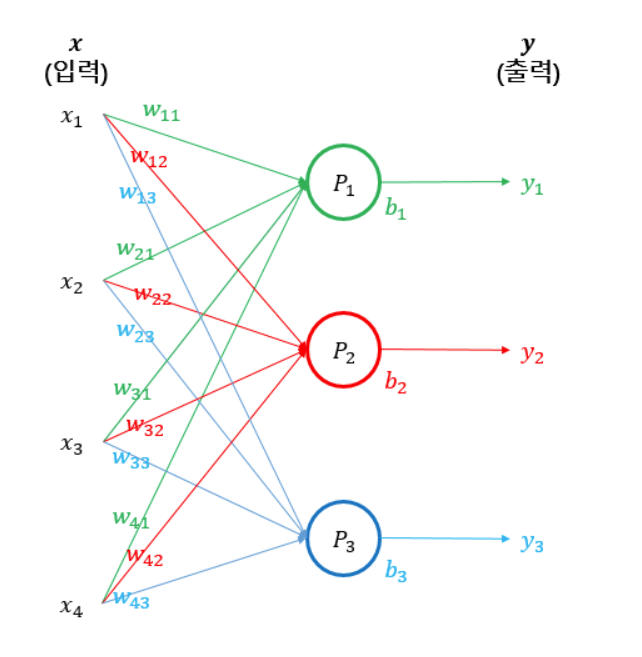

In [ ]:
RND_STD = 1
RND_MEAN = 0

input_cnt = df_dataset_x.shape[-1]
output_cnt = df_dataset_y.shape[-1]

In [ ]:
weight = np.random.normal(RND_MEAN, RND_STD, size=[input_cnt, output_cnt])
bias = np.random.normal(RND_MEAN, RND_STD, size = [output_cnt])
print('weight.shape : ', weight.shape)
print('bias.shape : ', bias.shape)
print('df_dataset_x : \n',df_dataset_x)
print('weight : \n', weight)
print('bias : \n', bias)

weight.shape :  (4, 3)
bias.shape :  (3,)
df_dataset_x : 
 [[42.     50.     80.      2.4265]]
weight : 
 [[ 0.24547027  0.18119168  2.06949729]
 [-0.70832948  0.65514242 -1.98378926]
 [-0.19898923  1.11380317 -0.84550513]
 [-1.1240382  -0.11925598 -0.32348462]]
bias : 
 [ 0.49075504  2.11493355 -0.54875529]


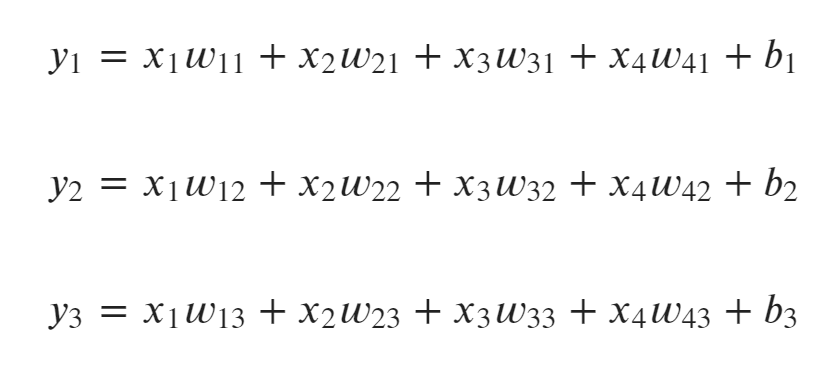

In [ ]:
P_1 = np.matmul(df_dataset_x[0],weight[:,0]) + bias[0]
P_2 = np.matmul(df_dataset_x[0],weight[:,1]) + bias[1]
P_3 = np.matmul(df_dataset_x[0],weight[:,2]) + bias[2]

P_total = np.matmul(df_dataset_x, weight) + bias

print(P_1)
print(P_2)
print(P_3)
print('-'*20)
print('P_total : \n',P_total)

-43.262584451702395
131.29698445506318
-81.24467811135243
--------------------
P_total : 
 [[-43.26258445 131.29698446 -81.24467811]]


In [ ]:
weight[:,0]

array([ 0.24547027, -0.70832948, -0.19898923, -1.1240382 ])

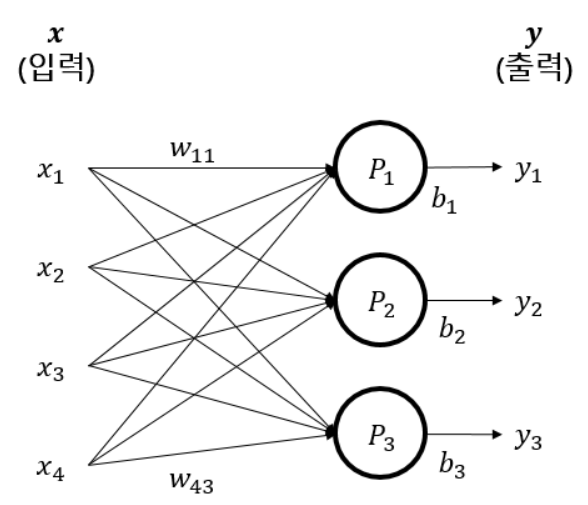

### (model) Parameter - w/b  
### Hyper Parameter  

##layer

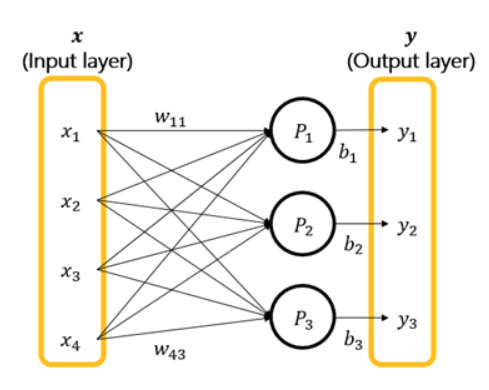

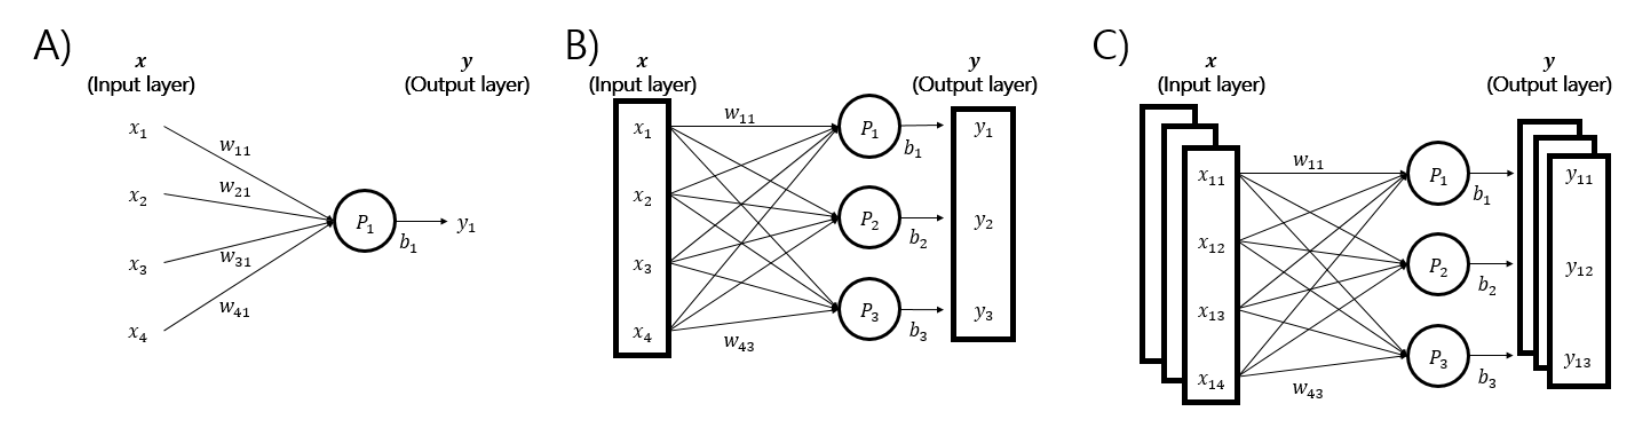

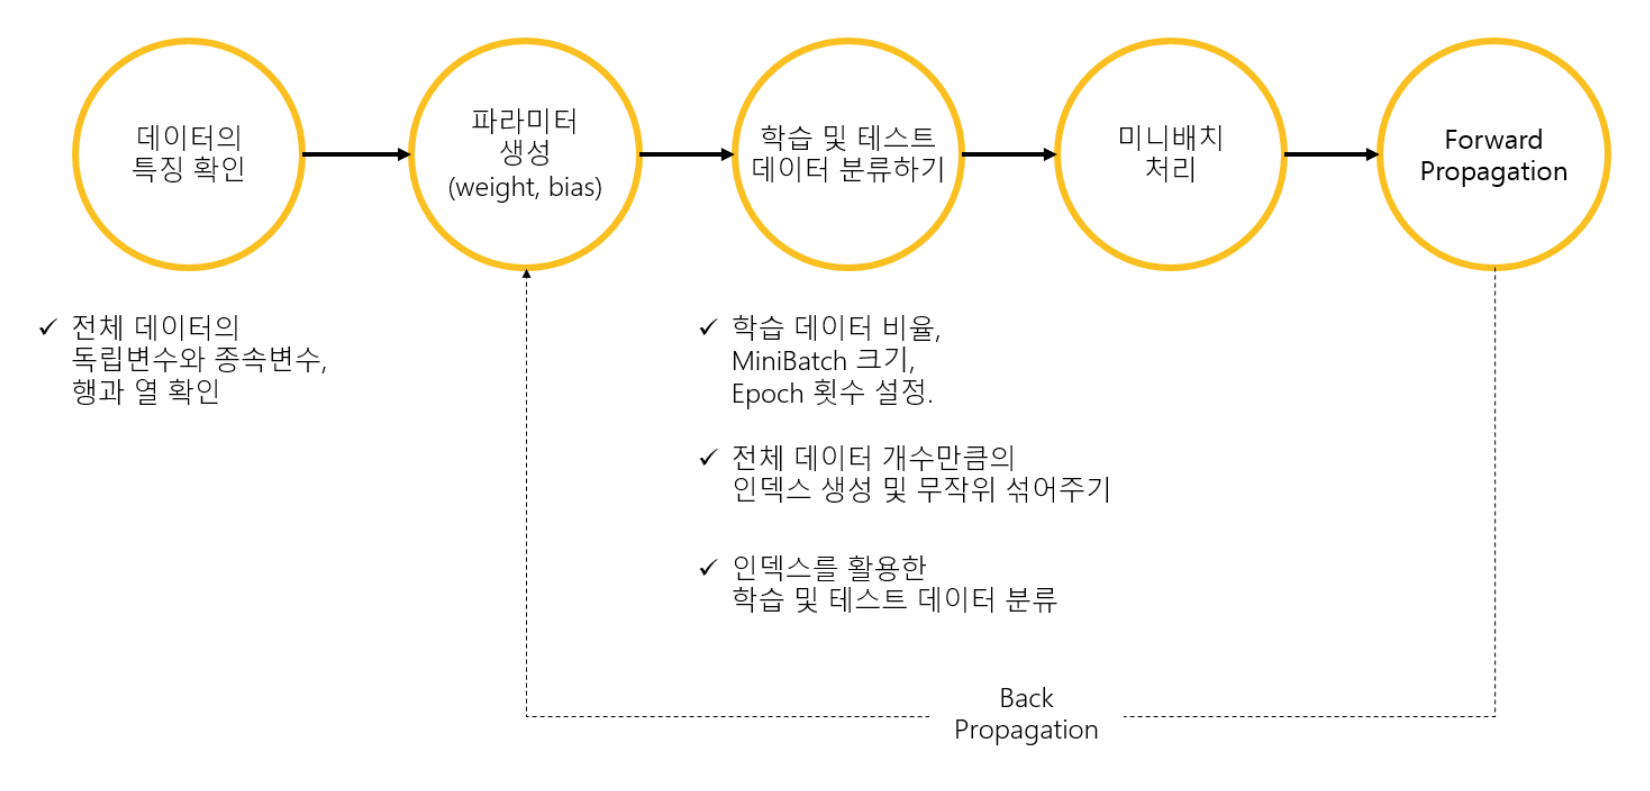

In [ ]:
#faults.mini로 실습
df = pd.read_csv('/content/faults_mini.csv')
df.info()
display(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   X_Minimum              10 non-null     int64
 1   Y_Minimum              10 non-null     int64
 2   Pixels_Areas           10 non-null     int64
 3   Steel_Plate_Thickness  10 non-null     int64
 4   Pastry                 10 non-null     int64
 5   Z_Scratch              10 non-null     int64
 6   K_Scatch               10 non-null     int64
dtypes: int64(7)
memory usage: 688.0 bytes


,X_Minimum,Y_Minimum,Pixels_Areas,Steel_Plate_Thickness,Pastry,Z_Scratch,K_Scatch
0,42,270900,267,80,1,0,0
1,1084,185575,108,40,0,0,1
2,1109,1170194,130,175,0,1,0
3,190,210936,132,150,1,0,0
4,330,429227,264,150,1,0,0
5,74,779144,1506,150,1,0,0
6,51,585861,139,70,0,1,0
7,397,604478,444,70,0,1,0
8,43,366881,4048,40,0,0,1
9,48,377537,3985,40,0,0,1


In [ ]:
input_cnt = 4
output_cnt = 3

data = np.asarray(df, dtype='float32')
print(type(data))
print(data)

<class 'numpy.ndarray'>
[[4.200000e+01 2.709000e+05 2.670000e+02 8.000000e+01 1.000000e+00
  0.000000e+00 0.000000e+00]
 [1.084000e+03 1.855750e+05 1.080000e+02 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]
 [1.109000e+03 1.170194e+06 1.300000e+02 1.750000e+02 0.000000e+00
  1.000000e+00 0.000000e+00]
 [1.900000e+02 2.109360e+05 1.320000e+02 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [3.300000e+02 4.292270e+05 2.640000e+02 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [7.400000e+01 7.791440e+05 1.506000e+03 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [5.100000e+01 5.858610e+05 1.390000e+02 7.000000e+01 0.000000e+00
  1.000000e+00 0.000000e+00]
 [3.970000e+02 6.044780e+05 4.440000e+02 7.000000e+01 0.000000e+00
  1.000000e+00 0.000000e+00]
 [4.300000e+01 3.668810e+05 4.048000e+03 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]
 [4.800000e+01 3.775370e+05 3.985000e+03 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]]


In [ ]:
RND_MEAN = 0
RND_STD = 1

weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
bias =  np.random.normal(RND_MEAN, RND_STD, size = [output_cnt])

print('weight.shape : ', weight.shape)
print('bias.shape : ', bias.shape)

weight.shape :  (4, 3)
bias.shape :  (3,)


In [ ]:
mb_size = 2
train_ratio = 0.8

MiniBatch_step_count = int(data.shape[0] * train_ratio) // mb_size
print('MiniBatch_step_count : ', MiniBatch_step_count)


test_begin_index = MiniBatch_step_count*mb_size
print('test_begin_index : ',test_begin_index)

MiniBatch_step_count :  4
test_begin_index :  8


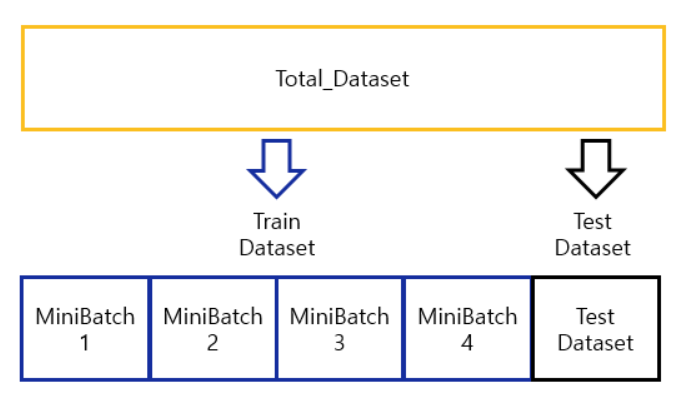

In [ ]:
shuffle_map = np.arange(data.shape[0])
print(shuffle_map)
np.random.shuffle(shuffle_map)
print('Now shuffle_map : ', shuffle_map)

[0 1 2 3 4 5 6 7 8 9]
Now shuffle_map :  [4 5 6 7 9 0 2 1 8 3]


In [ ]:
mb_data_1 = data[shuffle_map[0:2]]
mb_data_2 = data[shuffle_map[2:4]]
mb_data_3 = data[shuffle_map[4:6]]
mb_data_4 = data[shuffle_map[6:8]]

print('mb_data_1 : \n', mb_data_1)
print('mb_data_2 : \n', mb_data_2)
print('mb_data_3 : \n', mb_data_3)
print('mb_data_4 : \n', mb_data_4)

mb_data_1 : 
 [[3.30000e+02 4.29227e+05 2.64000e+02 1.50000e+02 1.00000e+00 0.00000e+00
  0.00000e+00]
 [7.40000e+01 7.79144e+05 1.50600e+03 1.50000e+02 1.00000e+00 0.00000e+00
  0.00000e+00]]
mb_data_2 : 
 [[5.10000e+01 5.85861e+05 1.39000e+02 7.00000e+01 0.00000e+00 1.00000e+00
  0.00000e+00]
 [3.97000e+02 6.04478e+05 4.44000e+02 7.00000e+01 0.00000e+00 1.00000e+00
  0.00000e+00]]
mb_data_3 : 
 [[4.80000e+01 3.77537e+05 3.98500e+03 4.00000e+01 0.00000e+00 0.00000e+00
  1.00000e+00]
 [4.20000e+01 2.70900e+05 2.67000e+02 8.00000e+01 1.00000e+00 0.00000e+00
  0.00000e+00]]
mb_data_4 : 
 [[1.109000e+03 1.170194e+06 1.300000e+02 1.750000e+02 0.000000e+00
  1.000000e+00 0.000000e+00]
 [1.084000e+03 1.855750e+05 1.080000e+02 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]]


In [ ]:
print('======첫 번째 미니배치의 독립과 종속변수 입니다.============')
mb_1_train_x = mb_data_1[:, :-output_cnt]
mb_1_train_y = mb_data_1[:, -output_cnt:]

print('mb_1_train_x : \n', mb_1_train_x)
print('mb_1_train_y : \n', mb_1_train_y)

print('======두 번째 미니배치의 독립과 종속변수 입니다.============')
mb_2_train_x = mb_data_2[:, :-output_cnt]
mb_2_train_y = mb_data_2[:, -output_cnt:]

print('mb_2_train_x : \n', mb_2_train_x)
print('mb_2_train_y : \n', mb_2_train_y)

print('======세 번째 미니배치의 독립과 종속변수 입니다.============')
mb_3_train_x = mb_data_3[:, :-output_cnt]
mb_3_train_y = mb_data_3[:, -output_cnt:]

print('mb_3_train_x : \n', mb_3_train_x)
print('mb_3_train_y : \n', mb_3_train_y)

print('======네 번째 미니배치의 독립과 종속변수 입니다.============')
mb_4_train_x = mb_data_4[:, :-output_cnt]
mb_4_train_y = mb_data_4[:, -output_cnt:]

print('mb_4_train_x : \n', mb_4_train_x)
print('mb_4_train_y : \n', mb_4_train_y)

======첫 번째 미니배치의 독립과 종속변수 입니다.============
mb_1_train_x : 
 [[3.30000e+02 4.29227e+05 2.64000e+02 1.50000e+02]
 [7.40000e+01 7.79144e+05 1.50600e+03 1.50000e+02]]
mb_1_train_y : 
 [[1. 0. 0.]
 [1. 0. 0.]]
======두 번째 미니배치의 독립과 종속변수 입니다.============
mb_2_train_x : 
 [[5.10000e+01 5.85861e+05 1.39000e+02 7.00000e+01]
 [3.97000e+02 6.04478e+05 4.44000e+02 7.00000e+01]]
mb_2_train_y : 
 [[0. 1. 0.]
 [0. 1. 0.]]
======세 번째 미니배치의 독립과 종속변수 입니다.============
mb_3_train_x : 
 [[4.80000e+01 3.77537e+05 3.98500e+03 4.00000e+01]
 [4.20000e+01 2.70900e+05 2.67000e+02 8.00000e+01]]
mb_3_train_y : 
 [[0. 0. 1.]
 [1. 0. 0.]]
======네 번째 미니배치의 독립과 종속변수 입니다.============
mb_4_train_x : 
 [[1.109000e+03 1.170194e+06 1.300000e+02 1.750000e+02]
 [1.084000e+03 1.855750e+05 1.080000e+02 4.000000e+01]]
mb_4_train_y : 
 [[0. 1. 0.]
 [0. 0. 1.]]


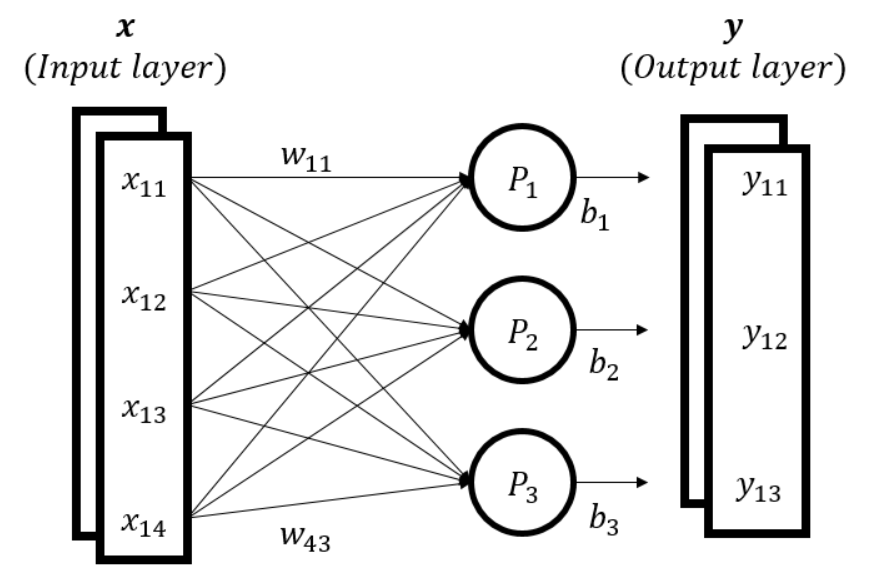

In [ ]:
print('첫 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)')
mb_1_y_hat_1 = np.matmul(mb_1_train_x, weight[:,0])+bias[0] #첫번쨰 미니배치의 첫번째 퍼셉트론..
mb_1_y_hat_2 = np.matmul(mb_1_train_x, weight[:,1])+bias[1]
mb_1_y_hat_3 = np.matmul(mb_1_train_x, weight[:,2])+bias[2]
print('mb_1_y_hat_1: \n', mb_1_y_hat_1)
print('mb_1_y_hat_2: \n', mb_1_y_hat_2)
print('mb_1_y_hat_3: \n', mb_1_y_hat_3)

print('\n')
print('두 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)')
mb_2_y_hat_1 = np.matmul(mb_2_train_x, weight[:,0])+bias[0] #두번쨰 미니배치의 첫번째 퍼셉트론..
mb_2_y_hat_2 = np.matmul(mb_2_train_x, weight[:,1])+bias[1]
mb_2_y_hat_3 = np.matmul(mb_2_train_x, weight[:,2])+bias[2]
print('mb_2_y_hat_1: \n', mb_2_y_hat_1)
print('mb_2_y_hat_2: \n', mb_2_y_hat_2)
print('mb_2_y_hat_3: \n', mb_2_y_hat_3)


print('\n')
print('세 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)')
mb_3_y_hat_1 = np.matmul(mb_3_train_x, weight[:,0])+bias[0] #세번쨰 미니배치의 첫번째 퍼셉트론..
mb_3_y_hat_2 = np.matmul(mb_3_train_x, weight[:,1])+bias[1]
mb_3_y_hat_3 = np.matmul(mb_3_train_x, weight[:,2])+bias[2]
print('mb_3_y_hat_1: \n', mb_3_y_hat_1)
print('mb_3_y_hat_2: \n', mb_3_y_hat_2)
print('mb_3_y_hat_3: \n', mb_3_y_hat_3)

print('\n')
print('네 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)')
mb_4_y_hat_1 = np.matmul(mb_4_train_x, weight[:,0])+bias[0] #네번쨰 미니배치의 첫번째 퍼셉트론..
mb_4_y_hat_2 = np.matmul(mb_4_train_x, weight[:,1])+bias[1]
mb_4_y_hat_3 = np.matmul(mb_4_train_x, weight[:,2])+bias[2]
print('mb_4_y_hat_1: \n', mb_4_y_hat_1)
print('mb_4_y_hat_2: \n', mb_4_y_hat_2)
print('mb_4_y_hat_3: \n', mb_4_y_hat_3)

첫 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)
mb_1_y_hat_1: 
 [-45949.7112354 -85679.0606886]
mb_1_y_hat_2: 
 [-169231.86969203 -306750.51042601]
mb_1_y_hat_3: 
 [100976.60072215 183176.95292441]


두 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)
mb_2_y_hat_1: 
 [-63155.55384742 -65025.84903264]
mb_2_y_hat_2: 
 [-231715.66926743 -238406.25266412]
mb_2_y_hat_3: 
 [137803.09865704 142001.20703993]


세 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)
mb_3_y_hat_1: 
 [-45818.22932729 -29402.80919745]
mb_3_y_hat_2: 
 [-145262.29950535 -106886.78017242]
mb_3_y_hat_3: 
 [88270.58368422 63760.0030267 ]


네 번째 미니배치의 퍼셉트론 값(P_1, P_2, P_3)
mb_4_y_hat_1: 
 [-124359.21726168  -18415.39839571]
mb_4_y_hat_2: 
 [-461902.44538032  -72198.21159769]
mb_4_y_hat_3: 
 [274919.20080996  43243.33830546]


In [ ]:
mb_data_total = np.vstack((mb_data_1, mb_data_2, mb_data_3, mb_data_4))
mb_data_total_x = mb_data_total[:, :-3]
display(pd.DataFrame(mb_data_total_x))

,0,1,2,3
0,330.0,429227.0,264.0,150.0
1,74.0,779144.0,1506.0,150.0
2,51.0,585861.0,139.0,70.0
3,397.0,604478.0,444.0,70.0
4,48.0,377537.0,3985.0,40.0
5,42.0,270900.0,267.0,80.0
6,1109.0,1170194.0,130.0,175.0
7,1084.0,185575.0,108.0,40.0


In [ ]:
mb_total_y_hat = np.matmul(mb_data_total_x, weight) + bias
print(mb_total_y_hat)

[[ -45949.7112354  -169231.86969203  100976.60072215]
 [ -85679.0606886  -306750.51042601  183176.95292441]
 [ -63155.55384742 -231715.66926743  137803.09865704]
 [ -65025.84903264 -238406.25266412  142001.20703993]
 [ -45818.22932729 -145262.29950535   88270.58368422]
 [ -29402.80919745 -106886.78017242   63760.0030267 ]
 [-124359.21726168 -461902.44538032  274919.20080996]
 [ -18415.39839571  -72198.21159769   43243.33830546]]


In [ ]:
weight

array([[ 1.55356723,  1.05069073, -0.39911299],
       [-0.10771973, -0.39592092,  0.2350936 ],
       [-1.31938106,  1.0384831 , -0.13290521],
       [ 0.80934632,  0.57711727,  1.56398532]])

In [ ]:
bias

array([0.74303322, 0.62317559, 0.27615393])

# 4. 머신러닝

###데이터 수집 이어서
### CSS를 활용하는 방법 외에 re (정규표현식)을 사용하여 필요한 데이터를 추출할 수 있다

In [ ]:
import re
import requests as req
text = req.get('https://www.google.com').text
re.findall('<div class=(.*?)</div>', text)

['gbh style=left:0>',
 'gbh style=right:0>',
 '"ds" style="height:32px;margin:4px 0"><input class="lst" style="margin:0;padding:5px 8px 0 6px;vertical-align:top;color:#000" autocomplete="off" value="" title="Google Search" maxlength="2048" name="q" size="57">']

## 네이버에서 정보처리기사 검색 후 파워링크 부분 가져오기

In [ ]:
#파워링크 이름들 가져오기
url = 'https://search.naver.com/search.naver'
res = req.get(url, params={'query':'정보처리기사'} )
soup = BeautifulSoup(res.text, 'html.parser')

# 뉴스페이지 스크레이핑


In [ ]:
#접근이 안될때는 header~
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36',
        'Referer':'https://www.google.com/'}

In [ ]:
#네이버 뉴스에 제목과, 내용 or 소제목 굵은 글씨
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=103&oid=346&aid=0000027271'

res = req.get(url, headers=headers)

### Selenium 라이브러리

* 웹 페이지를 테스트(제어)하기 위한 자동 테스팅 모듈

+ [Selenium with Python](https://selenium-python.readthedocs.io/index.html)
+ [Selenium Documentation](https://www.selenium.dev/documentation/en/)


selenium 설치 & 크롬드라이버 설치

* 크롤러와 웹 브라우저를 연결시켜 주기 위한 웹 드라이버 설치

In [ ]:
# 설치(20.08 코랩 기준)
!pip install Selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver  #크롬 드라이버

# 한글 폰트 설치
!apt-get install -y fonts-nanum*

In [ ]:
#selenium 설정
from selenium import webdriver  #크롬이라서 웹드라이버
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정(코랩이어서 창을 띄울수 없기 때문에 설정)
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Chrome 드라이버 생성 후 Browser 객체 반환 
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


###selenium으로 크롬 브라우저 웹 사이트 접근

In [ ]:
# 해당 URL로 브라우저 실행
driver.get('http://www.naver.com')

In [ ]:
# 검색한 사이트 이미지로 저장
driver.save_screenshot('website.png')
# driver.quit()  #브라우저 종료

True

원하는 태그 찾기

요소검사를 진행해서 id나 class 또는 태그명을 확인
* driver.find_element_by_css_selector (단수)
* driver.find_elements_by_css_selector (복수)



요소 접근 함수(Element Access Founction)

|단일 객체 반환 함수 <br>(find()과 같은 형태로 반환) | 리스트 반환 함수 <br>(find_all()과 같은 형태로 반환)|
|-|-|
|find_element_by_id<br>find_element_by_class_name<br>find_element_by_css_selector<br>find_element_tag_name<br>find_element_name<br>find_element_by_link | find_elements_by_id<br>find_elements_by_class_name<br>find_elements_by_css_selector<br>find_elements_tag_name<br>find_elements_name<br>find_elements_by_link|

In [ ]:
#자주 사용하는 패키지들
import urllib
from urllib.request import urlopen
from urllib.parse import quote_plus     #웹용 인코딩으로 변환(문자가 다를 때)
from bs4 import BeautifulSoup as bs    #축약하면 bs
from selenium.webdriver.common.keys import Keys   #selenium에서 key를 입력할 때 들어있는 것이 keys
import time

In [ ]:
#이미지 크롤링
url = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
kword = input('검색어를 입력하세요 : ')
base_url = url + quote_plus(kword)  #quote_plus가 변환해줌
base_url

검색어를 입력하세요 : 머신러닝


'https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D'

In [ ]:
driver.get(base_url)
time.sleep(1)   #바로 찍으면 로드하는데 시간이 걸려서 아무것도 찍히지 않는다.
                #time.sleep으로 1초 늦게 찍으면 로딩이 된 이미지가 찍힌다.
driver.save_screenshot('website1.png')

True

In [ ]:
#페이지 다운다운해서 밑에 나오는 이미지 찍기
body = driver.find_element_by_css_selector('body')

for i in range(5):
  body.send_keys(Keys.PAGE_DOWN)
  time.sleep(1)
  driver.save_screenshot(f'website_{i}.png')

In [ ]:
mkdir './data'

In [ ]:
#이미지 가져오기
imgs = driver.find_elements_by_css_selector('img')
for idx, img in enumerate(imgs):
  # print(img.get_attribute('src'))
  imgUrl = img.get_attribute('src')
  imgName = './data/' + kword + str(idx) + '.jpg'
  try:
    urllib.request.urlretrieve(imgUrl, imgName)
  except:
    print('error : ', imgName, imgUrl)

error :  ./data/머신러닝154.jpg None


### 네이버 검색

In [ ]:
from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = wb.Chrome('chromedriver', chrome_options=chrome_options)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: use options instead of chrome_options
  


In [ ]:
url = 'https://www.naver.com'
driver.get(url)
# driver.save_screenshot('naver01.png')

In [ ]:
input_search = driver.find_element_by_id('query')
input_search.send_keys('광주날씨')
input_search.send_keys(Keys.ENTER)      #enter
driver.back()                           #back
time.sleep(1)
driver.save_screenshot('naver02.png')

True

In [ ]:
search_btn = driver.find_element_by_id('search_btn')
search_btn.click()
time.sleep(1)
driver.save_screenshot('naver05.png')

True

### 뉴스 제목, 내용가져오기

In [ ]:
from selenium import webdriver as wb
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import time
import pandas as pd
import requests as req

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = wb.Chrome('chromedriver', chrome_options=chrome_options)

In [ ]:
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=105&oid=018&aid=0004171212'

### 구글에서 검색어 입력한 후 웹 페이지 결과 띄우기

웹 제어 함수 (Web Control Function)

1. 마우스 제어
 * 클릭 요소 : driver.find_element_by_css_selector().click()
 * submit 타입요소 : driver.find_element_by_css_selector().submit()

2. 키보드 제어
 * driver.find_element_by_css_selector().send_keys(text)
 * Ex1) input 태그에 ‘크롤링’을 입력할 때
   -> driver.find_element_by_css_selector().send_keys(“크롤링”)
 * Ex2) 키보드의 특수키 중 Enter를 입력할 경우
   -> driver.find_element_by_css_selector().send_keys(Keys.ENTER)

In [ ]:
url = 'http://www.google.com'
driver.get(url)
driver.save_screenshot('google01.png')


True

In [ ]:
input = driver.find_element_by_tag_name('input')
input.send_keys('크롤링')
driver.save_screenshot('google02.png')
input.send_keys(Keys.ENTER)
driver.save_screenshot('google03.png')

True

### 한솥도시락의 이름,가격 정보 수집

In [ ]:
from selenium import webdriver as wb
from bs4 import BeautifulSoup as bs
import time
import pandas as pd

In [ ]:
url = 'https://www.hsd.co.kr/menu/menu_list'
driver.get(url)
driver.save_screenshot('hsd01.png')     #<-정적페이지, 동적페이지는 time을 좀가져야 이미지가 로드된다.

True

In [ ]:
soup = bs(driver.page_source, 'html.parser')

In [ ]:
num = []
names = []
prices = []

name = soup.find_all('h4',class_='h fz_03')    #find_all = findAll
price = soup.select('div.item-price > strong')

len(name),len(price)  #(20,20)

for i in range(len(name)):
  num.append(i+1)
  names.append(name[i].text)
  prices.append(price[i].text)


In [ ]:
info = {'num' : num, 'name' : names, 'price' : prices}
df = pd.DataFrame(info)
df.set_index('num', inplace=True)    #inplace를 넣으면 원본도 바뀐다.
df.head()

,name,price
num,,
1,비벼먹는 치킨마요 김밥,"4,300"
2,비벼먹는 참치마요 김밥,"4,300"
3,비벼먹는 소불고기마요 김밥,"4,300"
4,국물떡볶이 & 토네이도소세지 튀김set,"5,300"
5,국물 떡볶이,"3,000"


In [ ]:
#lunchBox_info.csv로 저장
df.to_csv('lunchBox_info.csv', encoding='utf-8')    #인코딩 중요

#### 스타벅스 모든 음료 정보 가져오기

In [ ]:
#스타벅스 매장 위치 
url = 'https://www.starbucks.co.kr/store/store_map.do'
driver.get(url)
loca_search = driver.find_element_by_class_name('loca_search')
loca_search.click()

In [ ]:
#광주지역 클릭
li = driver.find_element_by_css_selector('ul.sido_arae_box > li + li + li')
li.click()

In [ ]:
#광주지역 -> 전체 클릭
all = driver.find_element_by_css_selector('ul.gugun_arae_box > li')
all.click()

In [ ]:
soup = bs(driver.page_source, 'html.parser')
name = soup.select('#mCSB_3_container > ul > li > strong')
addr = soup.select('#mCSB_3_container > ul > li > p')

In [ ]:
names = []
address = []
tels = []
len(name), len(addr)      #(58,58)
for i in range(len(name)):
  names.append(name[i].text)
  address.append(addr[i].text[:-9])
  tels.append(addr[i].text[-9:])


In [ ]:
info = {'name' : names, 'address' : address, 'tell' : tels}
df = pd.DataFrame(info)
df.set_index('name', inplace=True)    #inplace를 넣으면 원본도 바뀐다.
df.head()

,address,tell
name,,
광주운남DT,광주광역시 광산구 임방울대로 156 (운남동),1522-3232
광주선운DT,광주광역시 광산구 선운로 20번길 63,1522-3232
광주산정DT,광주광역시 광산구 용아로 342 (산정동),1522-3232
광주흑석DT,광주광역시 광산구 사암로 367 (산정동),1522-3232
광주송정역,광주광역시 광산구 상무대로205번길 6 (송정동),1522-3232


### 웹 페이지 스크롤링

* Keys.PAGE_DOWN 활용

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import pandas as pd
import time

In [ ]:
url = 'https://www.google.com/search?source=hp&ei=-QZ1W6XKH4ui8AWe6oOgAQ&q=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0&oq=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0&gs_l=psy-ab.3..0l10.3446.6828.0.6945.11.9.0.1.1.0.178.797.1j5.6.0....0...1c.1j4.64.psy-ab..6.5.589...0i131k1j0i10k1.0.onTVEC6H7No'


### 유튜브 정보 수집

* 영상제목 / 영상주소 / 조회수 

In [ ]:
url_main = 'https://www.youtube.com'
url_sub = '/results?search_query='
query = '머신러닝'
